# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [30]:
client_df['cons_last_month'].value_counts()

cons_last_month
0         4983
382647      27
509826      24
558120      18
469210      18
          ... 
202          1
30084        1
7190         1
17336        1
11367        1
Name: count, Length: 4751, dtype: int64

In [29]:
price_df['price_mid_peak_fix'].value_counts()

price_mid_peak_fix
0.000000     112996
16.291555     33156
16.226389     22477
16.226383     13554
8.367731       4092
8.334260       2477
8.334263       1590
16.791555       965
16.724391       539
16.724389       517
16.624889       303
16.958222       226
16.291560        40
14.334178        13
14.276842        11
8.367732         10
8.302559          7
6.927750          5
8.302565          5
6.516622          4
6.927756          3
16.408406         3
13.033244         2
17.291555         2
16.226388         2
17.124888         1
16.408411         1
17.458221         1
Name: count, dtype: int64

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14606 non-null  object 
 1   channel_sales             14606 non-null  object 
 2   cons_12m                  14606 non-null  int64  
 3   cons_gas_12m              14606 non-null  int64  
 4   cons_last_month           14606 non-null  int64  
 5   date_activ                14606 non-null  object 
 6   date_end                  14606 non-null  object 
 7   date_modif_prod           14606 non-null  object 
 8   date_renewal              14606 non-null  object 
 9   forecast_cons_12m         14606 non-null  float64
 10  forecast_cons_year        14606 non-null  int64  
 11  forecast_discount_energy  14606 non-null  float64
 12  forecast_meter_rent_12m   14606 non-null  float64
 13  forecast_price_energy_p1  14606 non-null  float64
 14  foreca

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [5]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

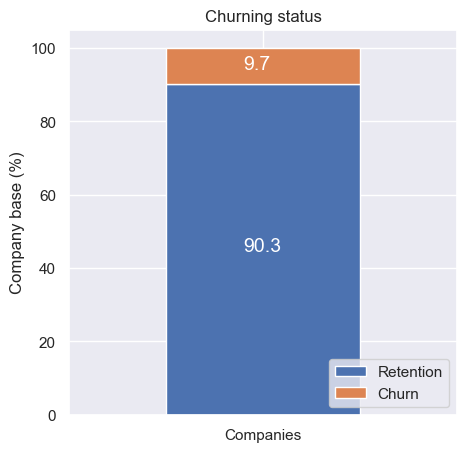

In [6]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

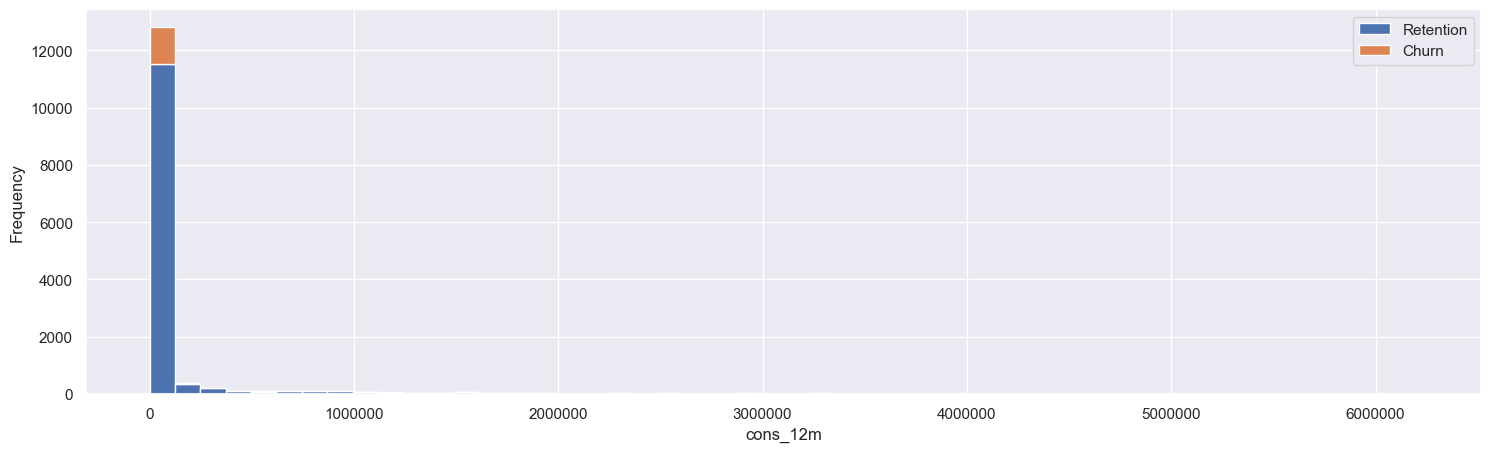

In [7]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

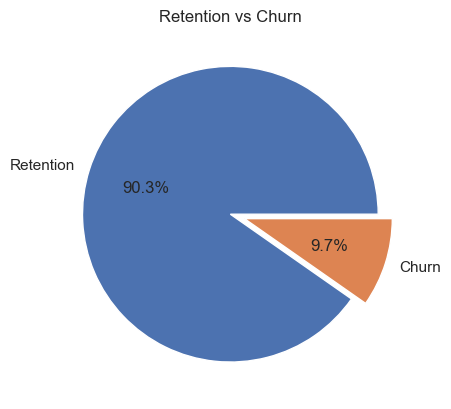

In [30]:
plt.pie(client_df['churn'].value_counts(), labels=['Retention', 'Churn'], autopct='%1.1f%%', explode=(0,0.1))
plt.title("Retention vs Churn")
plt.show()

In [8]:
contract_dates = pd.concat([client_df['date_activ'], client_df['date_end']])

In [9]:
client_df1 = client_df

In [10]:
client_df1['date_activ'] = pd.to_datetime(client_df1['date_activ'])

In [11]:
client_df1['date_end'] = pd.to_datetime(client_df1['date_end'])

In [12]:
client_df['Quarter'] = client_df1['date_activ'].dt.to_period("Q")

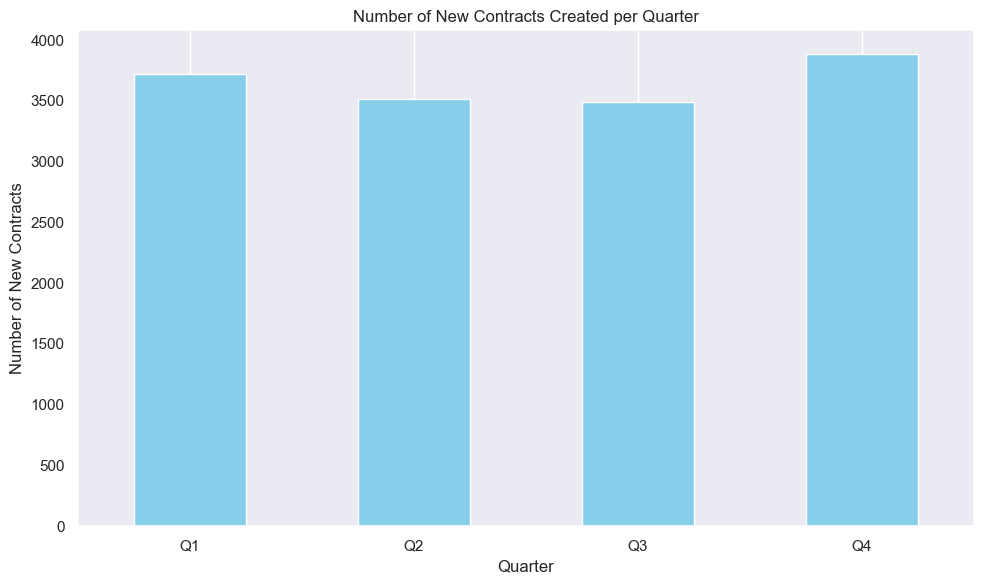

In [19]:

client_df1['date_activ'] = pd.to_datetime(client_df1['date_activ'])
client_df1['Quarter'] = client_df1['date_activ'].dt.quarter
new_contract_counts = client_df1['Quarter'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
new_contract_counts.plot(kind='bar', color='skyblue')
plt.title('Number of New Contracts Created per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of New Contracts')
plt.xticks(range(0, 4), ['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


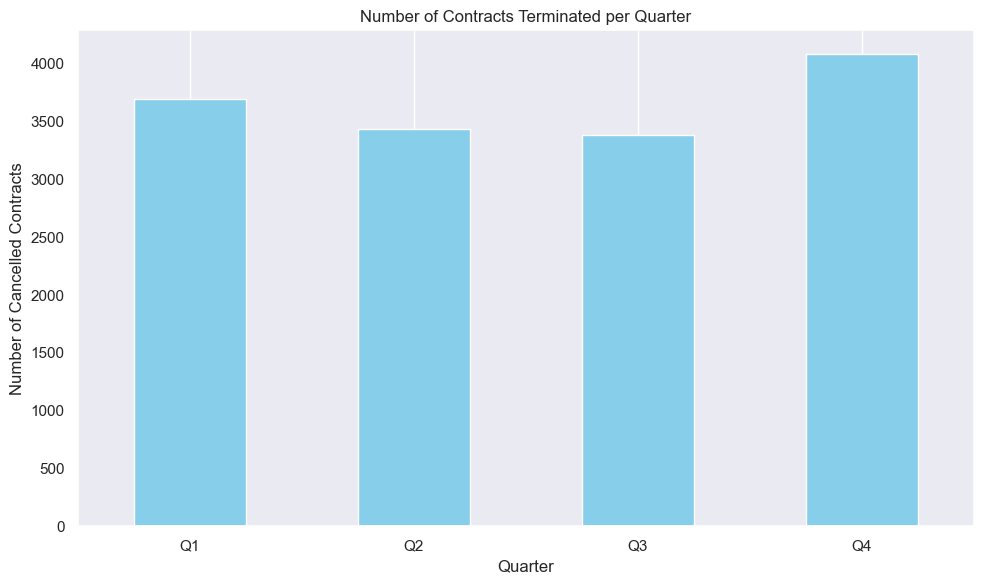

In [20]:

client_df1['date_end'] = pd.to_datetime(client_df1['date_end'])
client_df1['Quarter1'] = client_df1['date_end'].dt.quarter
new_contract_counts = client_df1['Quarter1'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
new_contract_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Contracts Terminated per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Cancelled Contracts')
plt.xticks(range(0, 4), ['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


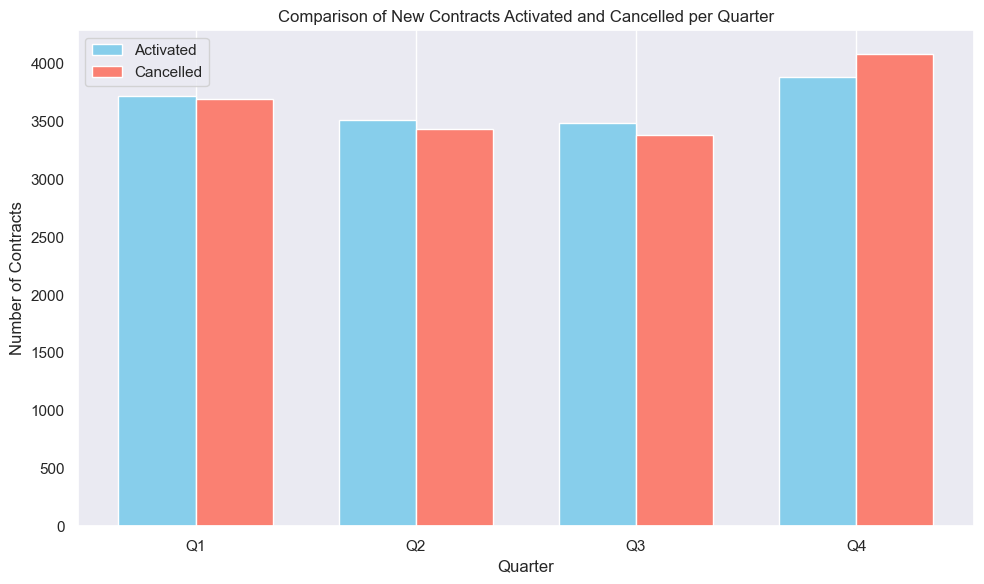

In [21]:

activated_counts = client_df1['Quarter'].value_counts().sort_index()
cancelled_counts = client_df1['Quarter1'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(1, 5)
plt.bar(index, activated_counts, width=bar_width, label='Activated', color='skyblue')
plt.bar([i + bar_width for i in index], cancelled_counts, width=bar_width, label='Cancelled', color='salmon')
plt.title('Comparison of New Contracts Activated and Cancelled per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Contracts')
plt.xticks([i + bar_width / 2 for i in index], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


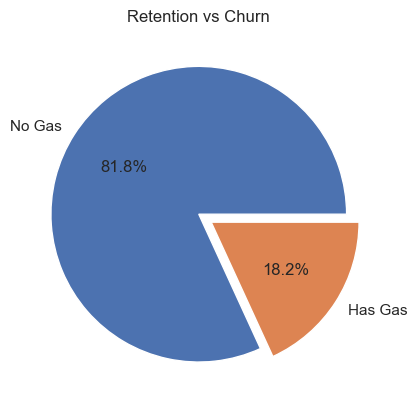

In [22]:
plt.pie(client_df['has_gas'].value_counts(), labels=['No Gas', 'Has Gas'], autopct='%1.1f%%', explode=(0,0.1))
plt.title("Retention vs Churn")
plt.show()

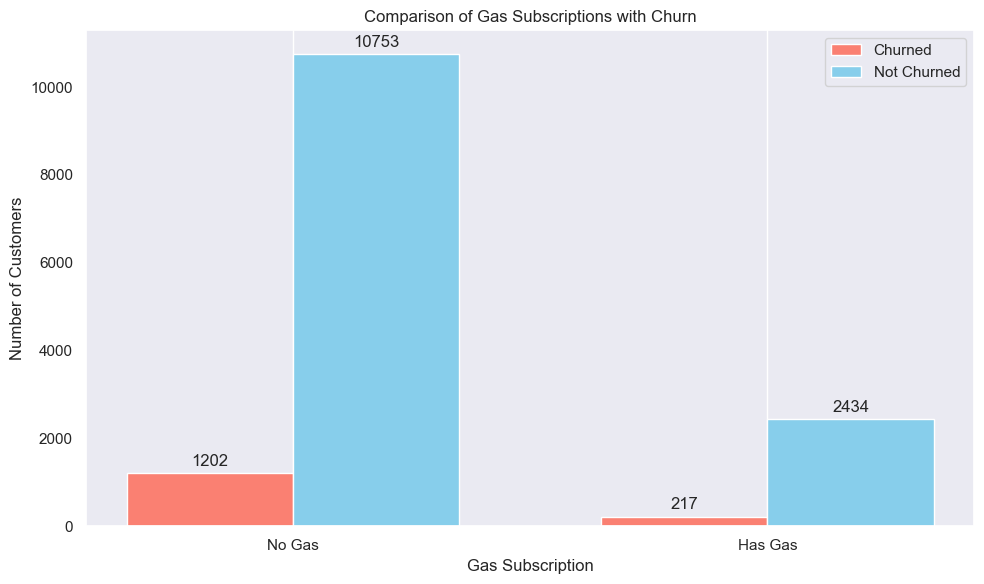

In [23]:
grouped_counts = client_df.groupby(['has_gas', 'churn']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(grouped_counts))
bars1 = plt.bar(index, grouped_counts[1], width=bar_width, label='Churned', color='salmon')
bars2 = plt.bar([i + bar_width for i in index], grouped_counts[0], width=bar_width, label='Not Churned', color='skyblue')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Comparison of Gas Subscriptions with Churn')
plt.xlabel('Gas Subscription')
plt.ylabel('Number of Customers')
plt.xticks([i + bar_width / 2 for i in index], ['No Gas', 'Has Gas'])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


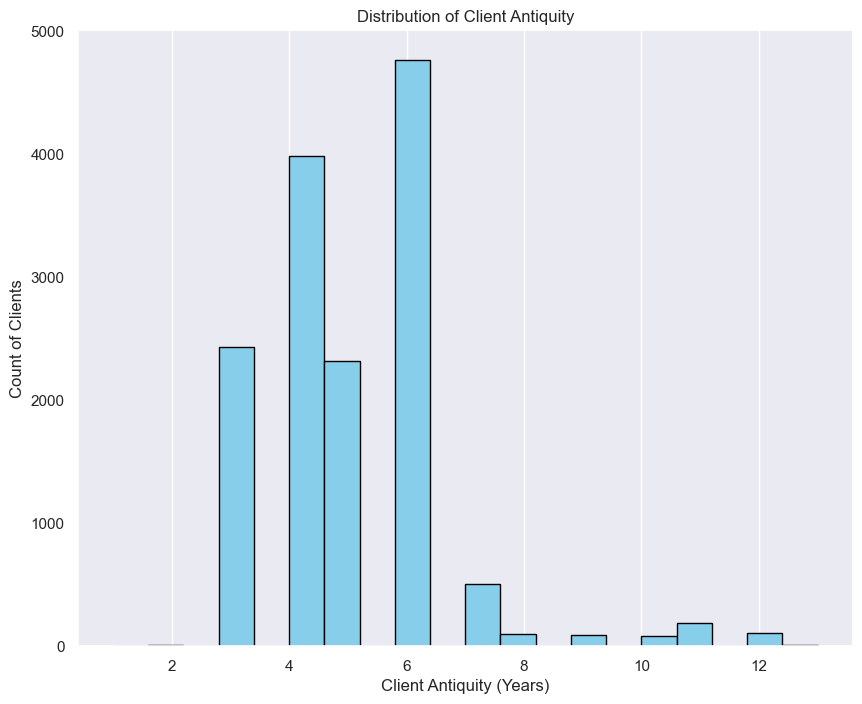

In [105]:
plt.figure(figsize=(10, 8))
plt.hist(client_df['num_years_antig'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Client Antiquity (Years)')
plt.ylabel('Count of Clients')
plt.title('Distribution of Client Antiquity')
plt.grid(axis='y')
plt.show()


## Given the above it seems that most contracts fall into some of the lowest net margins.

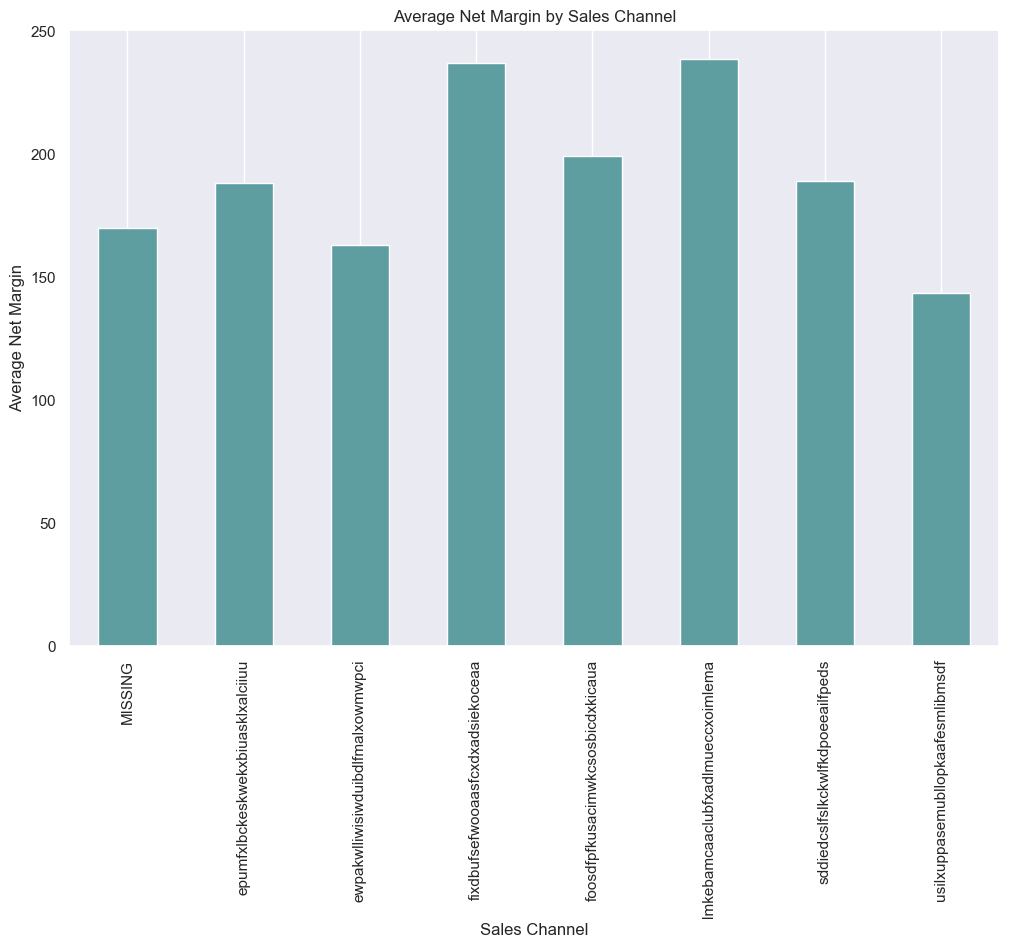

In [110]:
import matplotlib.pyplot as plt

# Calculate the average net margin for each sales channel
avg_net_margin_by_channel = client_df.groupby('channel_sales')['net_margin'].mean()

# Plotting
plt.figure(figsize=(12, 8))
avg_net_margin_by_channel.plot(kind='bar', color='cadetblue')
plt.xlabel('Sales Channel')
plt.ylabel('Average Net Margin')
plt.title('Average Net Margin by Sales Channel')
plt.grid(axis='y')
plt.show()


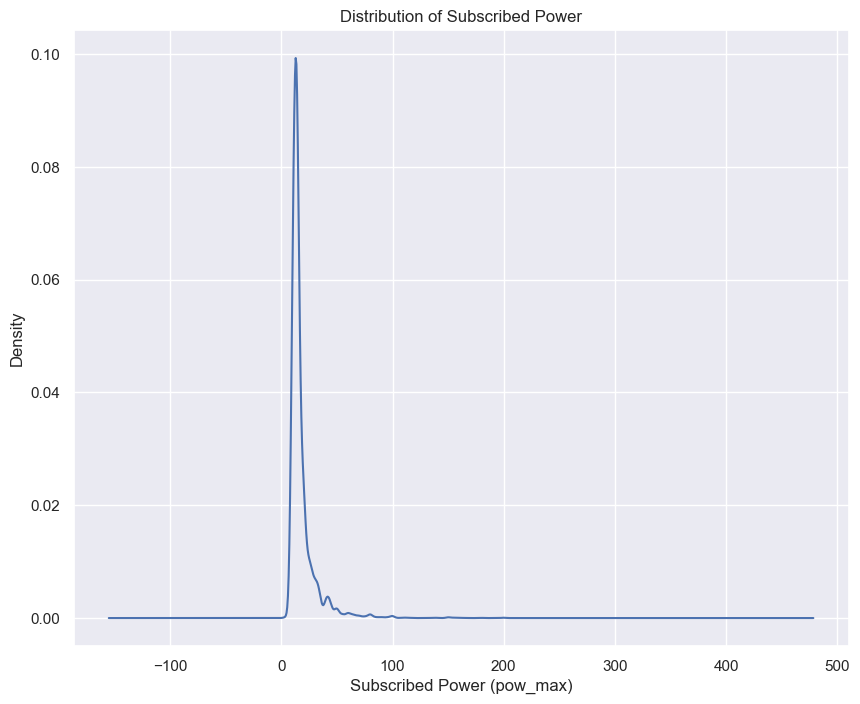

In [108]:
plt.figure(figsize=(10, 8))
client_df['pow_max'].plot(kind='kde')
plt.xlabel('Subscribed Power (pow_max)')
plt.title('Distribution of Subscribed Power')
plt.grid(True)
plt.show()


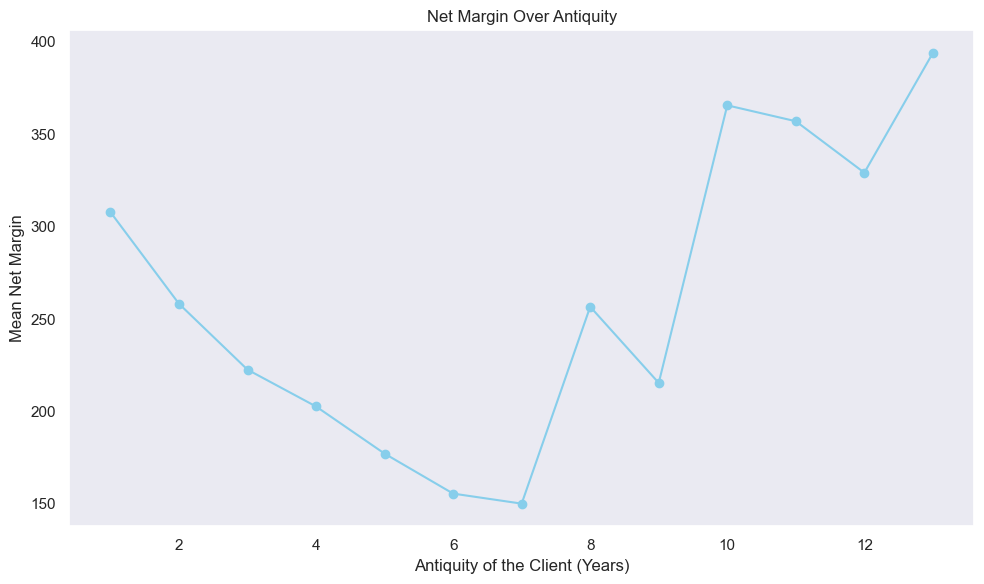

In [24]:
mean_net_margin = client_df.groupby('num_years_antig')['net_margin'].mean()

# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_net_margin.index, mean_net_margin.values, marker='o', color='skyblue', linestyle='-')
plt.title('Net Margin Over Antiquity')
plt.xlabel('Antiquity of the Client (Years)')
plt.ylabel('Mean Net Margin')
plt.grid()
plt.tight_layout()
plt.show()


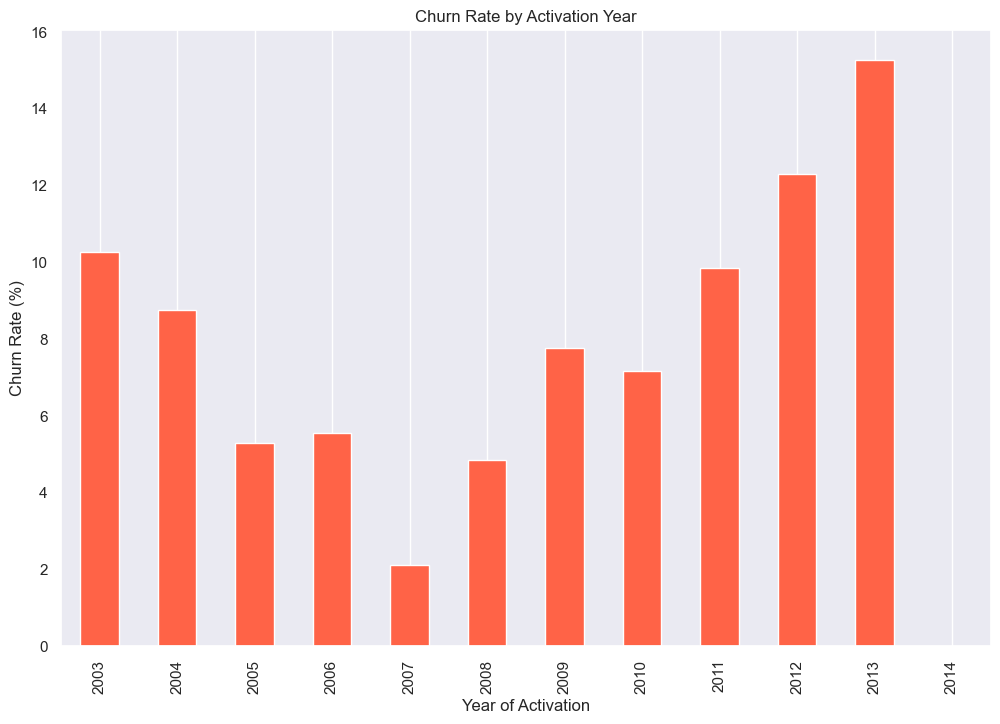

In [109]:
client_df['activation_year'] = pd.to_datetime(client_df['date_activ']).dt.year
churn_rate_by_year = client_df.groupby('activation_year')['churn'].mean() * 100  # Convert to percentage

plt.figure(figsize=(12, 8))
churn_rate_by_year.plot(kind='bar', color='tomato')
plt.xlabel('Year of Activation')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Activation Year')
plt.grid(axis='y')
plt.show()


> Given the above it seems like many contracts which were given out during the 2007/8 Recession have a very low churn rate.      
> But as can be seen below, the number of contracts signed during the recession is quite low, even though the profit margins for more mature contracts are higher.

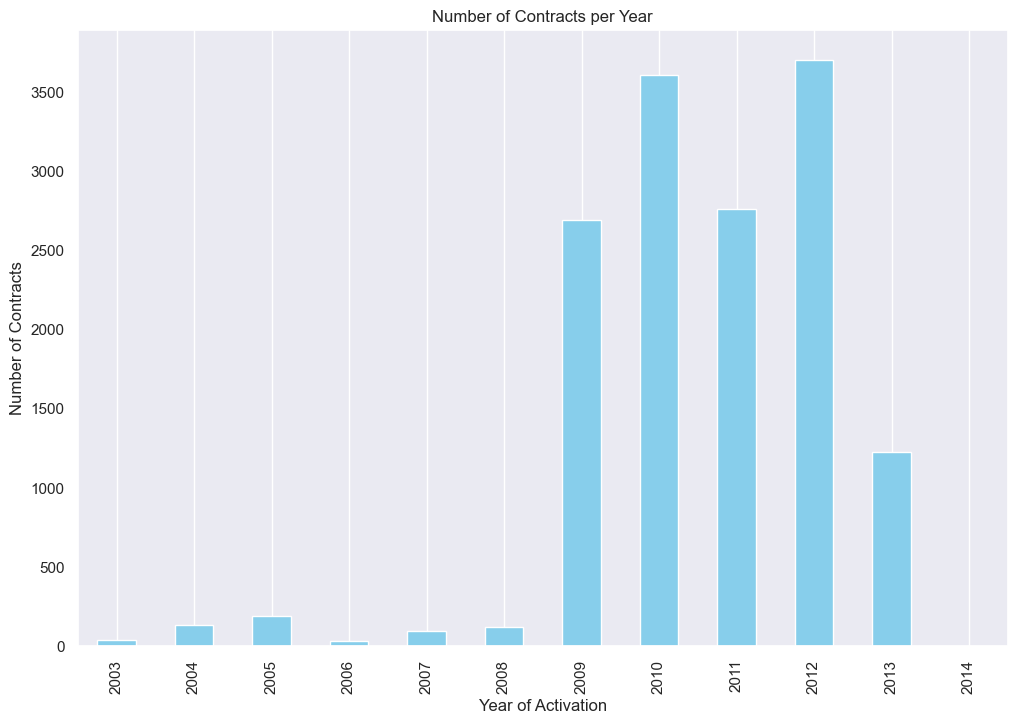

In [27]:

client_df['activation_year'] = pd.to_datetime(client_df['date_activ']).dt.year
contracts_per_year = client_df.groupby('activation_year').size()

plt.figure(figsize=(12, 8))
contracts_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year of Activation')
plt.ylabel('Number of Contracts')
plt.title('Number of Contracts per Year')
plt.grid(axis='y')
plt.show()


Text(0, 0.5, 'Frequency')

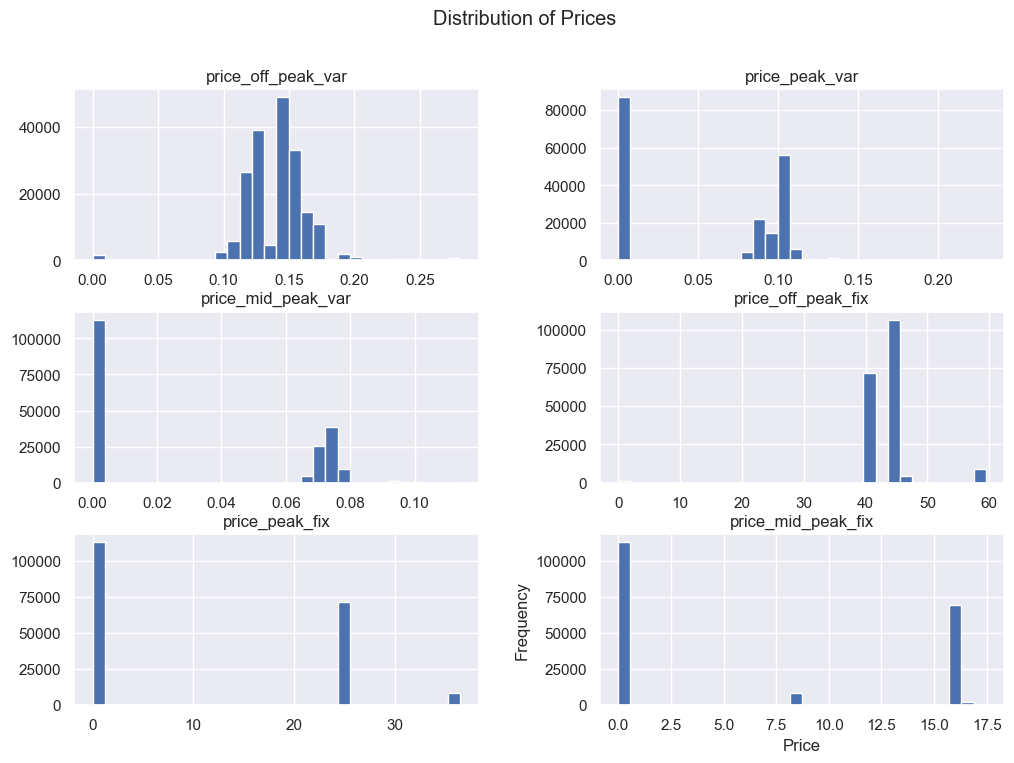

In [4]:
price_df[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
          'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')


# DataSet

I would love to be able to plot, price fluctuations over time, price in terms of consumption, etc.

But seemingly this information is missing, what does consumed gas mean? Liters, Dollars, Etc?

Given this, I hope I am wrong, but these are the plots I was able to come up with.